<a href="https://colab.research.google.com/github/zenoxyn/ecommerce-customer-satisfaction-analysis/blob/main/ecommerce_customer_satisfaction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv("/content/data_ecommerce/olist_orders_dataset.csv")
reviews = pd.read_csv("/content/data_ecommerce/olist_order_reviews_dataset.csv")
items = pd.read_csv("/content/data_ecommerce/olist_order_items_dataset.csv")
products = pd.read_csv("/content/data_ecommerce/olist_products_dataset.csv")

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# Gabungkan orders dan reviews berdasarkan order_id
order_reviews = pd.merge(orders, reviews, on='order_id', how='inner')

# Lihat hasil gabungan
order_reviews[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'review_score']].head()


,order_id,order_purchase_timestamp,order_delivered_customer_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,4
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,4
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,5
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,5


In [8]:
# Ubah kolom waktu jadi format datetime
order_reviews['order_purchase_timestamp'] = pd.to_datetime(order_reviews['order_purchase_timestamp'])
order_reviews['order_delivered_customer_date'] = pd.to_datetime(order_reviews['order_delivered_customer_date'])

# Hitung lama pengiriman dalam hari
order_reviews['delivery_time'] = (order_reviews['order_delivered_customer_date'] - order_reviews['order_purchase_timestamp']).dt.days

# Tampilkan kolom penting
order_reviews[['review_score', 'delivery_time']].dropna().head()


,review_score,delivery_time
0,4,8.0
1,4,13.0
2,5,9.0
3,5,13.0
4,5,2.0


from matplotlib import pyplot as plt
_df_0['review_score'].plot(kind='hist', bins=20, title='review_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['delivery_time'].plot(kind='hist', bins=20, title='delivery_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='review_score', y='delivery_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['review_score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'review_score'}, axis=1)
              .sort_values('review_score', ascending=True))
  xs = counted['review_score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('review_score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('review_score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['delivery_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'delivery_time'}, axis=1)
              .sort_values('delivery_time', ascending=True))
  xs = counted['delivery_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('delivery_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('delivery_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['review_score'].plot(kind='line', figsize=(8, 4), title='review_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['delivery_time'].plot(kind='line', figsize=(8, 4), title='delivery_time')
plt.gca().spines[['top', 'right']].set_visible(False)

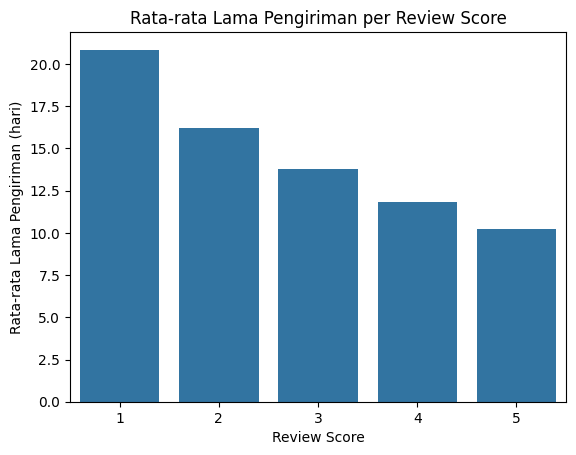

In [10]:
# Hitung rata-rata lama pengiriman untuk tiap rating
mean_delivery = order_reviews.groupby('review_score')['delivery_time'].mean().reset_index()

# Plot bar chart
sns.barplot(x='review_score', y='delivery_time', data=mean_delivery)
plt.title("Rata-rata Lama Pengiriman per Review Score")
plt.xlabel("Review Score")
plt.ylabel("Rata-rata Lama Pengiriman (hari)")
plt.show()


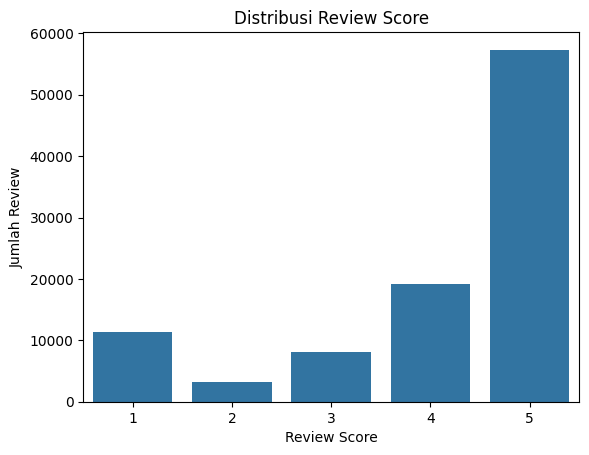

In [11]:
# Count review per skor
sns.countplot(x='review_score', data=order_reviews)
plt.title("Distribusi Review Score")
plt.xlabel("Review Score")
plt.ylabel("Jumlah Review")
plt.show()


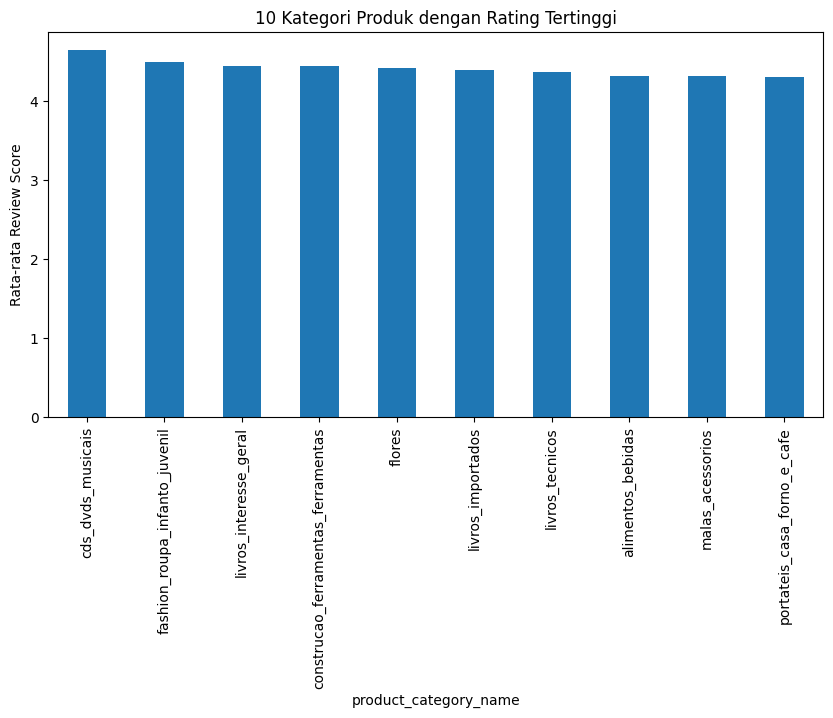

In [12]:
# Gabungkan order_reviews dengan items (untuk ambil product_id)
merged = pd.merge(order_reviews, items, on='order_id', how='inner')

# Gabungin dengan products.csv
merged = pd.merge(merged, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Hitung rata-rata rating per kategori
avg_rating_per_category = merged.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).head(10)

# Plot bar chart
avg_rating_per_category.plot(kind='bar', figsize=(10,5), title="10 Kategori Produk dengan Rating Tertinggi")
plt.ylabel("Rata-rata Review Score")
plt.show()
